In [1]:
import numpy as np

### Indexing and Slicing in Numpy Arrays

#### Indexing 

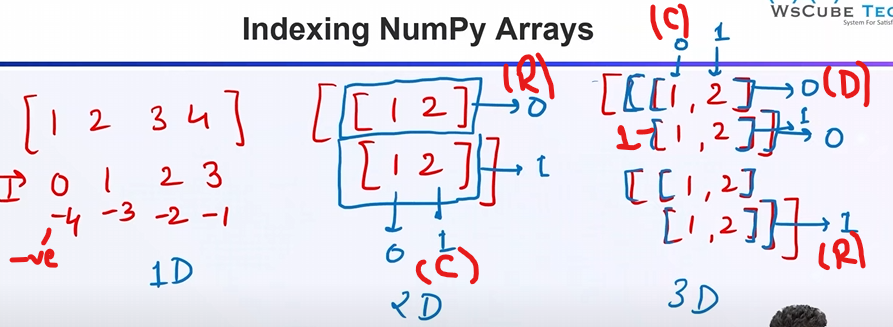
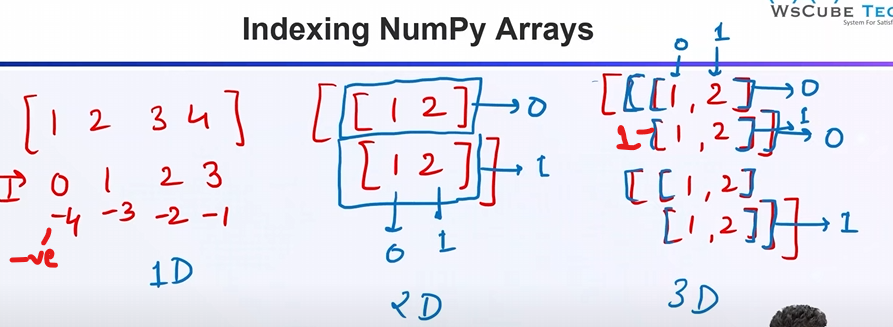

In [2]:
# Position of element in 1D Array
var = np.array([1,2,3,4,5])
print(var[3])

4


In [5]:
# Position of element in 2D Array
var1 = np.array([[1,2,3],[1,5,4]])
print(var1[1,2]) #var1[row=1,col=2]

4


In [12]:
# Position of element in 3D Array
var2 = np.array([[[1,2],[3,4],[5,6]]])
print(var2)
print(var2[0,1,1]) #var2[depth=0,row=1,col=1]

[[[1 2]
  [3 4]
  [5 6]]]
4


#### Slicing in NumPy

It allows you to extract a portion(subset) of an array using a range of indices. It works for 1D,2D,3D just like python list but with more powerful features

**Syntax -** array[start:stop(agar 3rd index tak chahiye toh 4 karna hai):step(agar 1 ka chahiye toh 2 karna hai)]

In [18]:
# Slicing in 1D Array
var = np.array([1,2,3,4,5,6,7,8,9])
print("Start to 7:", var[:7])
print("3 to end",var[2:])
print("2 to 8:",var[1:8])
print("Start to end with Jump of 1:",var[::2])
print("2 to 8 with jump of 2:",var[1:8:3])

Start to 7: [1 2 3 4 5 6 7]
3 to end [3 4 5 6 7 8 9]
2 to 8: [2 3 4 5 6 7 8]
Start to end with Jump of 1: [1 3 5 7 9]
2 to 8 with jump of 2: [2 5 8]


In [32]:
# Slicing in 2D Array
var1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(var1)
print("1st row:",var1[1,:])
print("1st and 2nd row:",var1[1:])
print("1st column:",var1[:,1])
print("1st and 2nd column:", var1[:,1:3])
print("5,6,8,9:",var1[1:,1:])
print("1,3,4,6,7,9:",var1[0:,0::2])


[[1 2 3]
 [4 5 6]
 [7 8 9]]
1st row: [4 5 6]
1st and 2nd row: [[4 5 6]
 [7 8 9]]
1st column: [2 5 8]
1st and 2nd column: [[2 3]
 [5 6]
 [8 9]]
5,6,8,9: [[5 6]
 [8 9]]
1,3,4,6,7,9: [[1 3]
 [4 6]
 [7 9]]


In [39]:
# Slicing in 3D Array
arr3D = np.arange(27).reshape(3, 3, 3)
print(arr3D,"\n")
print(arr3D[1],"\n")  # Extract the second "depth" slice
print(arr3D[:, 1, :],"\n")  # Row index 1 from all depths
print(arr3D[:, :, 2])  # Column index 2 from all depths






[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]] 

[[ 9 10 11]
 [12 13 14]
 [15 16 17]] 

[[ 3  4  5]
 [12 13 14]
 [21 22 23]] 

[[ 2  5  8]
 [11 14 17]
 [20 23 26]]


#### Iterating in NumPy Arrays

In [ ]:
# Iteration in 1D Array
var = np.array([1,2,3,4])

for i in var:
    print(i)
print()

# Iteration in 2D Array
var1 = np.array([[1,2,3],[5,3,4]])

# Individually elements ko iterate karne kai liye
for j in var1:
    for k in j:
        print(k)

print()

# Iteration in 3D Array 
var2 = np.array([[[1,2,3],[4,5,6],[7,8,9]]])

# Row-wise iterate karne kai liye
for i in var2:
    print(i)

# Individually elements ko iterate karne kai liye - Not efficient method for Multi-Dimensional Arrays
for i in var2:
    for j in i:
        for k in j:
            print(k)

**.nditer() -** used for iterating and modifying elements of multi-dimensional arrays in a flexible and efficient manner.  
Automatically flattens and iterates over elements one by one.  
Valid for all types of arrays.  
By default it iterates row-wise. To change that we use order="F" for column-wise iteration.

**Syntax -**  np.nditer(array_name, flags=[],op_flags=[])  <br>                    **flags=[] ->** Additional behavior options       <br>                           **op_flags=[] ->** Read/Write Operations or modify values        <br>                             **op_dtypes = [] ->** Change data type (optional)

In [64]:
# Simple Iteration in 3D Array 
var2 = np.array([[[1,2,3],[4,5,6],[7,8,9]]])

for i in np.nditer(var2):  #Here order="C" by default
    print(i,end=" ")  # Agar print mai sirf i hai toh vertically o/p dega & end=" " mai horizontally
print()

# Iterating with order
for i in np.nditer(var2,order="F"): #Cloumn wise iteration (order="F")
    print(i,end=" ")
print()


# Modifying Array Values - By default nditer() does not allow modifying array values
for i in np.nditer(var2,op_flags=["readwrite"]):
    i[...] = i*2

print(var2)
print()

# Iterating with external loop - it returns entire rows or chunks
for i in np.nditer(var2,flags=['external_loop']):
    print(i)
print()

# Changing Data Type and storing it in an temporary Buffer

for i in np.nditer(var2,flags=["buffered"],op_dtypes=["S"]):
    print(i)

1 2 3 4 5 6 7 8 9 
1 4 7 2 5 8 3 6 9 
[[[ 2  4  6]
  [ 8 10 12]
  [14 16 18]]]

[ 2  4  6  8 10 12 14 16 18]

np.bytes_(b'2')
np.bytes_(b'4')
np.bytes_(b'6')
np.bytes_(b'8')
np.bytes_(b'10')
np.bytes_(b'12')
np.bytes_(b'14')
np.bytes_(b'16')
np.bytes_(b'18')


In [65]:
# Iterating over Multiple Arrays - Pass it as a List in nditer
var1 = np.array([1,2,3])
var2 = np.array([4,5,6])

for i,j in np.nditer([var1,var2]):
    print(i,j)

1 4
2 5
3 6


**.ndenumerate(array)-** used to iterate over the elements fo a Numpy array, providing both - index and value of each element.  
Works for any dimensionality

In [68]:
# For 2D Array
var = np.array([[1,2,3],[4,5,6]])

for i,d in np.ndenumerate(var):
    print(f"Index: {i} & Value: {d}")

print()

# For 3D Array
var = np.array([[[1,2,3],[4,5,6],[7,8,9]]])

for i,d in np.ndenumerate(var):
    print(f"Index: {i} & Value: {d}")


Index: (0, 0) & Value: 1
Index: (0, 1) & Value: 2
Index: (0, 2) & Value: 3
Index: (1, 0) & Value: 4
Index: (1, 1) & Value: 5
Index: (1, 2) & Value: 6

Index: (0, 0, 0) & Value: 1
Index: (0, 0, 1) & Value: 2
Index: (0, 0, 2) & Value: 3
Index: (0, 1, 0) & Value: 4
Index: (0, 1, 1) & Value: 5
Index: (0, 1, 2) & Value: 6
Index: (0, 2, 0) & Value: 7
Index: (0, 2, 1) & Value: 8
Index: (0, 2, 2) & Value: 9


#### Difference b/w Copy and View Function

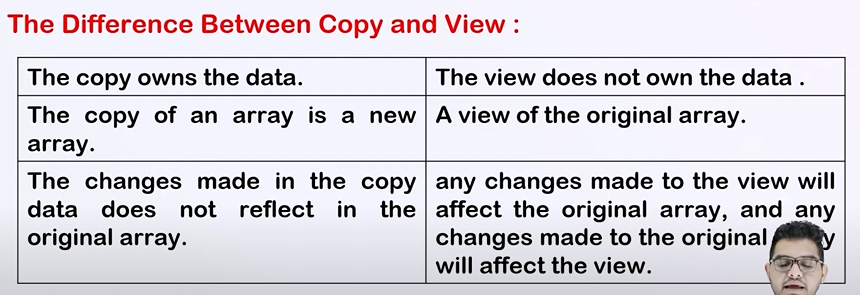

In [72]:
var = np.array([1,2,3,4,5])

co = var.copy()
co[1] = 9

vi = var.view()
vi[1] = 10

print("Array: ",var)
print(f"Copy: {co} & View: {vi}")

Array:  [ 1 10  3  4  5]
Copy: [1 9 3 4 5] & View: [ 1 10  3  4  5]
